<a href="https://colab.research.google.com/github/Mahe-Vardhan/srishti-24-Object-Detection-Using-yolov-/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [20]:
!pip install ultralytics

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!ls '/content/drive/MyDrive/Datasets/DatasetMask'
!ls '/content/drive/MyDrive/Datasets/DatasetMask/train/'

face_mask_detection.yaml  test	train  valid
train


In [36]:
import numpy as np
import cv2
image = cv2.imread('/content/drive/MyDrive/Datasets/DatasetMask/train/images/5e353e347af50726986e84c0.jpeg')
image = cv2.imread('/content/drive/MyDrive/Datasets/DatasetMask/valid/images/maksssksksss67.png')

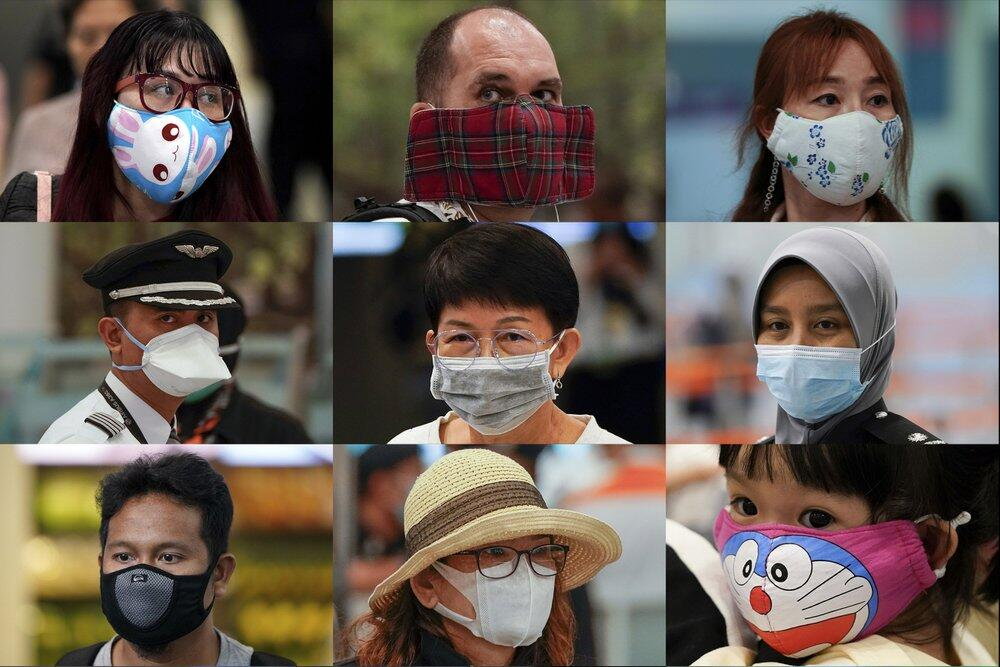

In [37]:
# dispying with different width
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Datasets/DatasetMask/train/train/images/5e353e347af50726986e84c0.jpeg', width = 300)

# Training the Model

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.pt") # As medium version takes too long time to feed iam using the small version of yolov8
results = model.train(data="/content/drive/MyDrive/Datasets/DatasetMask/face_mask_detection.yaml", epochs=2, imgsz=200)

100%|██████████| 21.5M/21.5M [00:00<00:00, 147MB/s]


Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Datasets/DatasetMask/face_mask_detection.yaml, epochs=2, time=None, patience=50, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /content/drive/MyDrive/Datasets/DatasetMask/train/train/labels.cache... 990 images, 33 backgrounds, 0 corrupt: 100%|██████████| 1023/1023 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Datasets/DatasetMask/valid/valid/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/train16
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      1.968      1.893      1.233        103        224: 100%|██████████| 64/64 [05:51<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.73s/it]

                   all        294       1473      0.686      0.258      0.265      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.494          1      1.021         75        224: 100%|██████████| 64/64 [05:55<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:36<00:00,  3.68s/it]

                   all        294       1473      0.833      0.321      0.378      0.189



2 epochs completed in 0.219 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 22.5MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


                   all        294       1473      0.833      0.321      0.378      0.188
               no_mask        294        225      0.666      0.387      0.433      0.197
                  mask        294       1235      0.832      0.576      0.643      0.333
         improper_mask        294         13          1          0     0.0574     0.0355
Speed: 0.3ms preprocess, 84.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train16


## Evaluating the model on the validation set

In [2]:
results = model.val()

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Datasets/DatasetMask/valid/valid/labels.cache... 294 images, 0 backgrounds, 0 corrupt: 100%|██████████| 294/294 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:45<00:00,  2.39s/it]


                   all        294       1473      0.831      0.321      0.376      0.188
               no_mask        294        225       0.66      0.387      0.433      0.197
                  mask        294       1235      0.832      0.577      0.643      0.333
         improper_mask        294         13          1          0     0.0525     0.0323
Speed: 0.4ms preprocess, 102.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train162


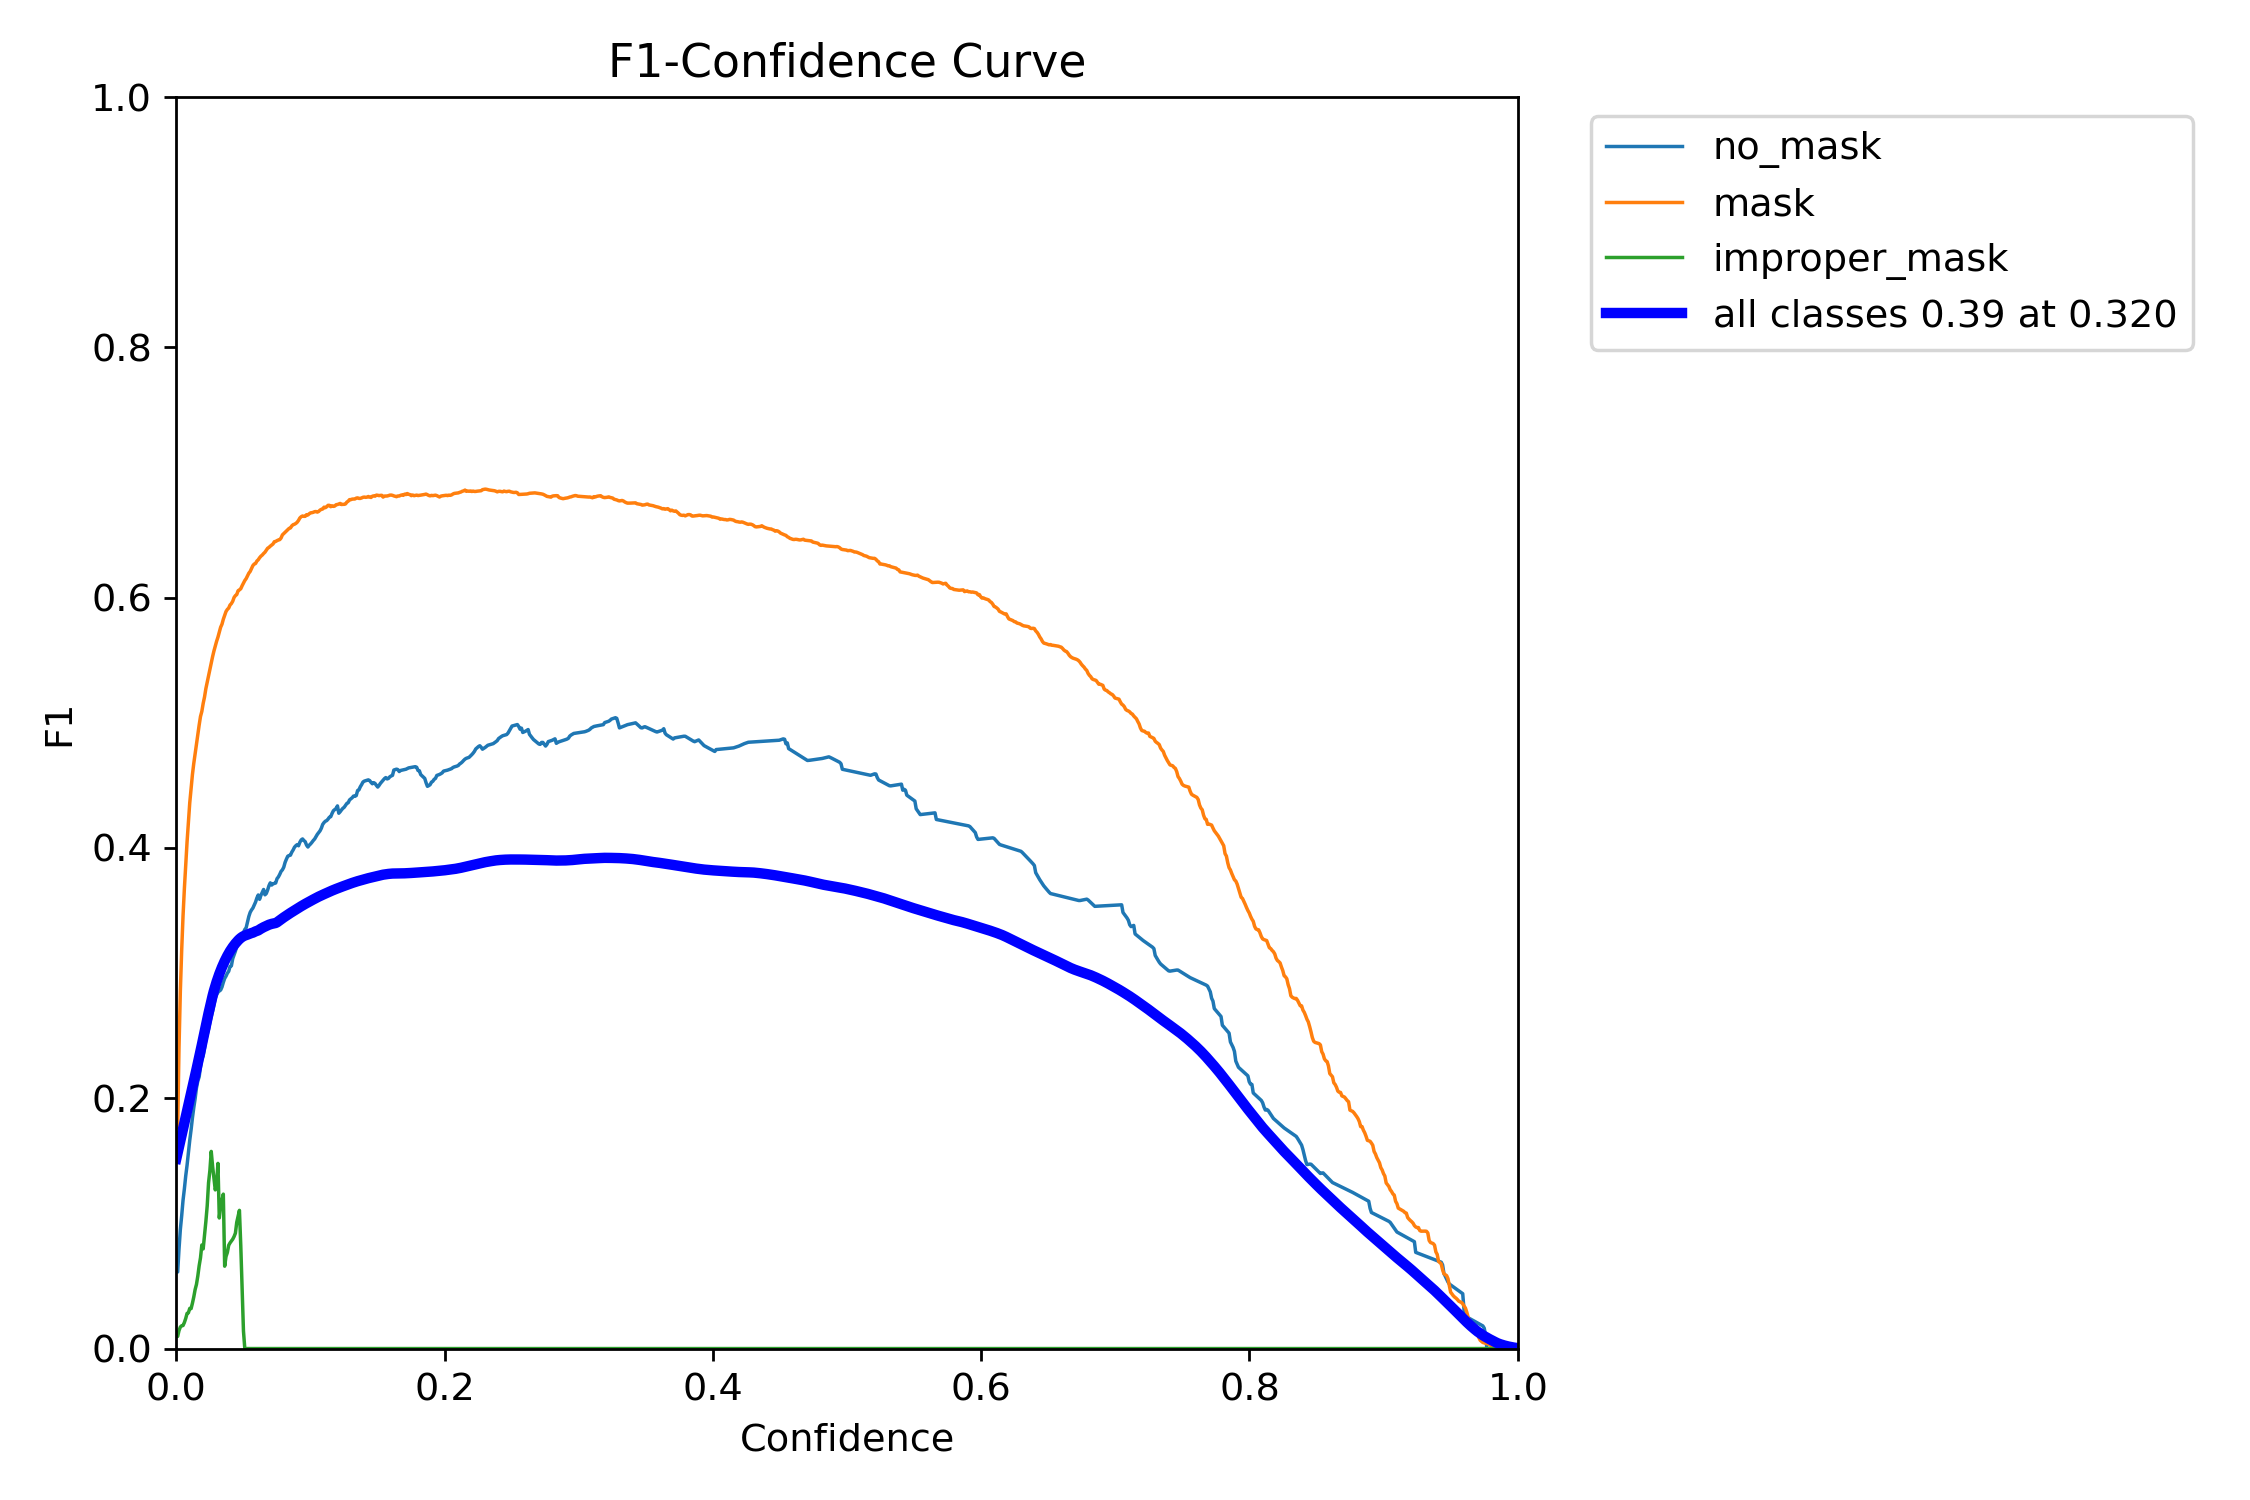

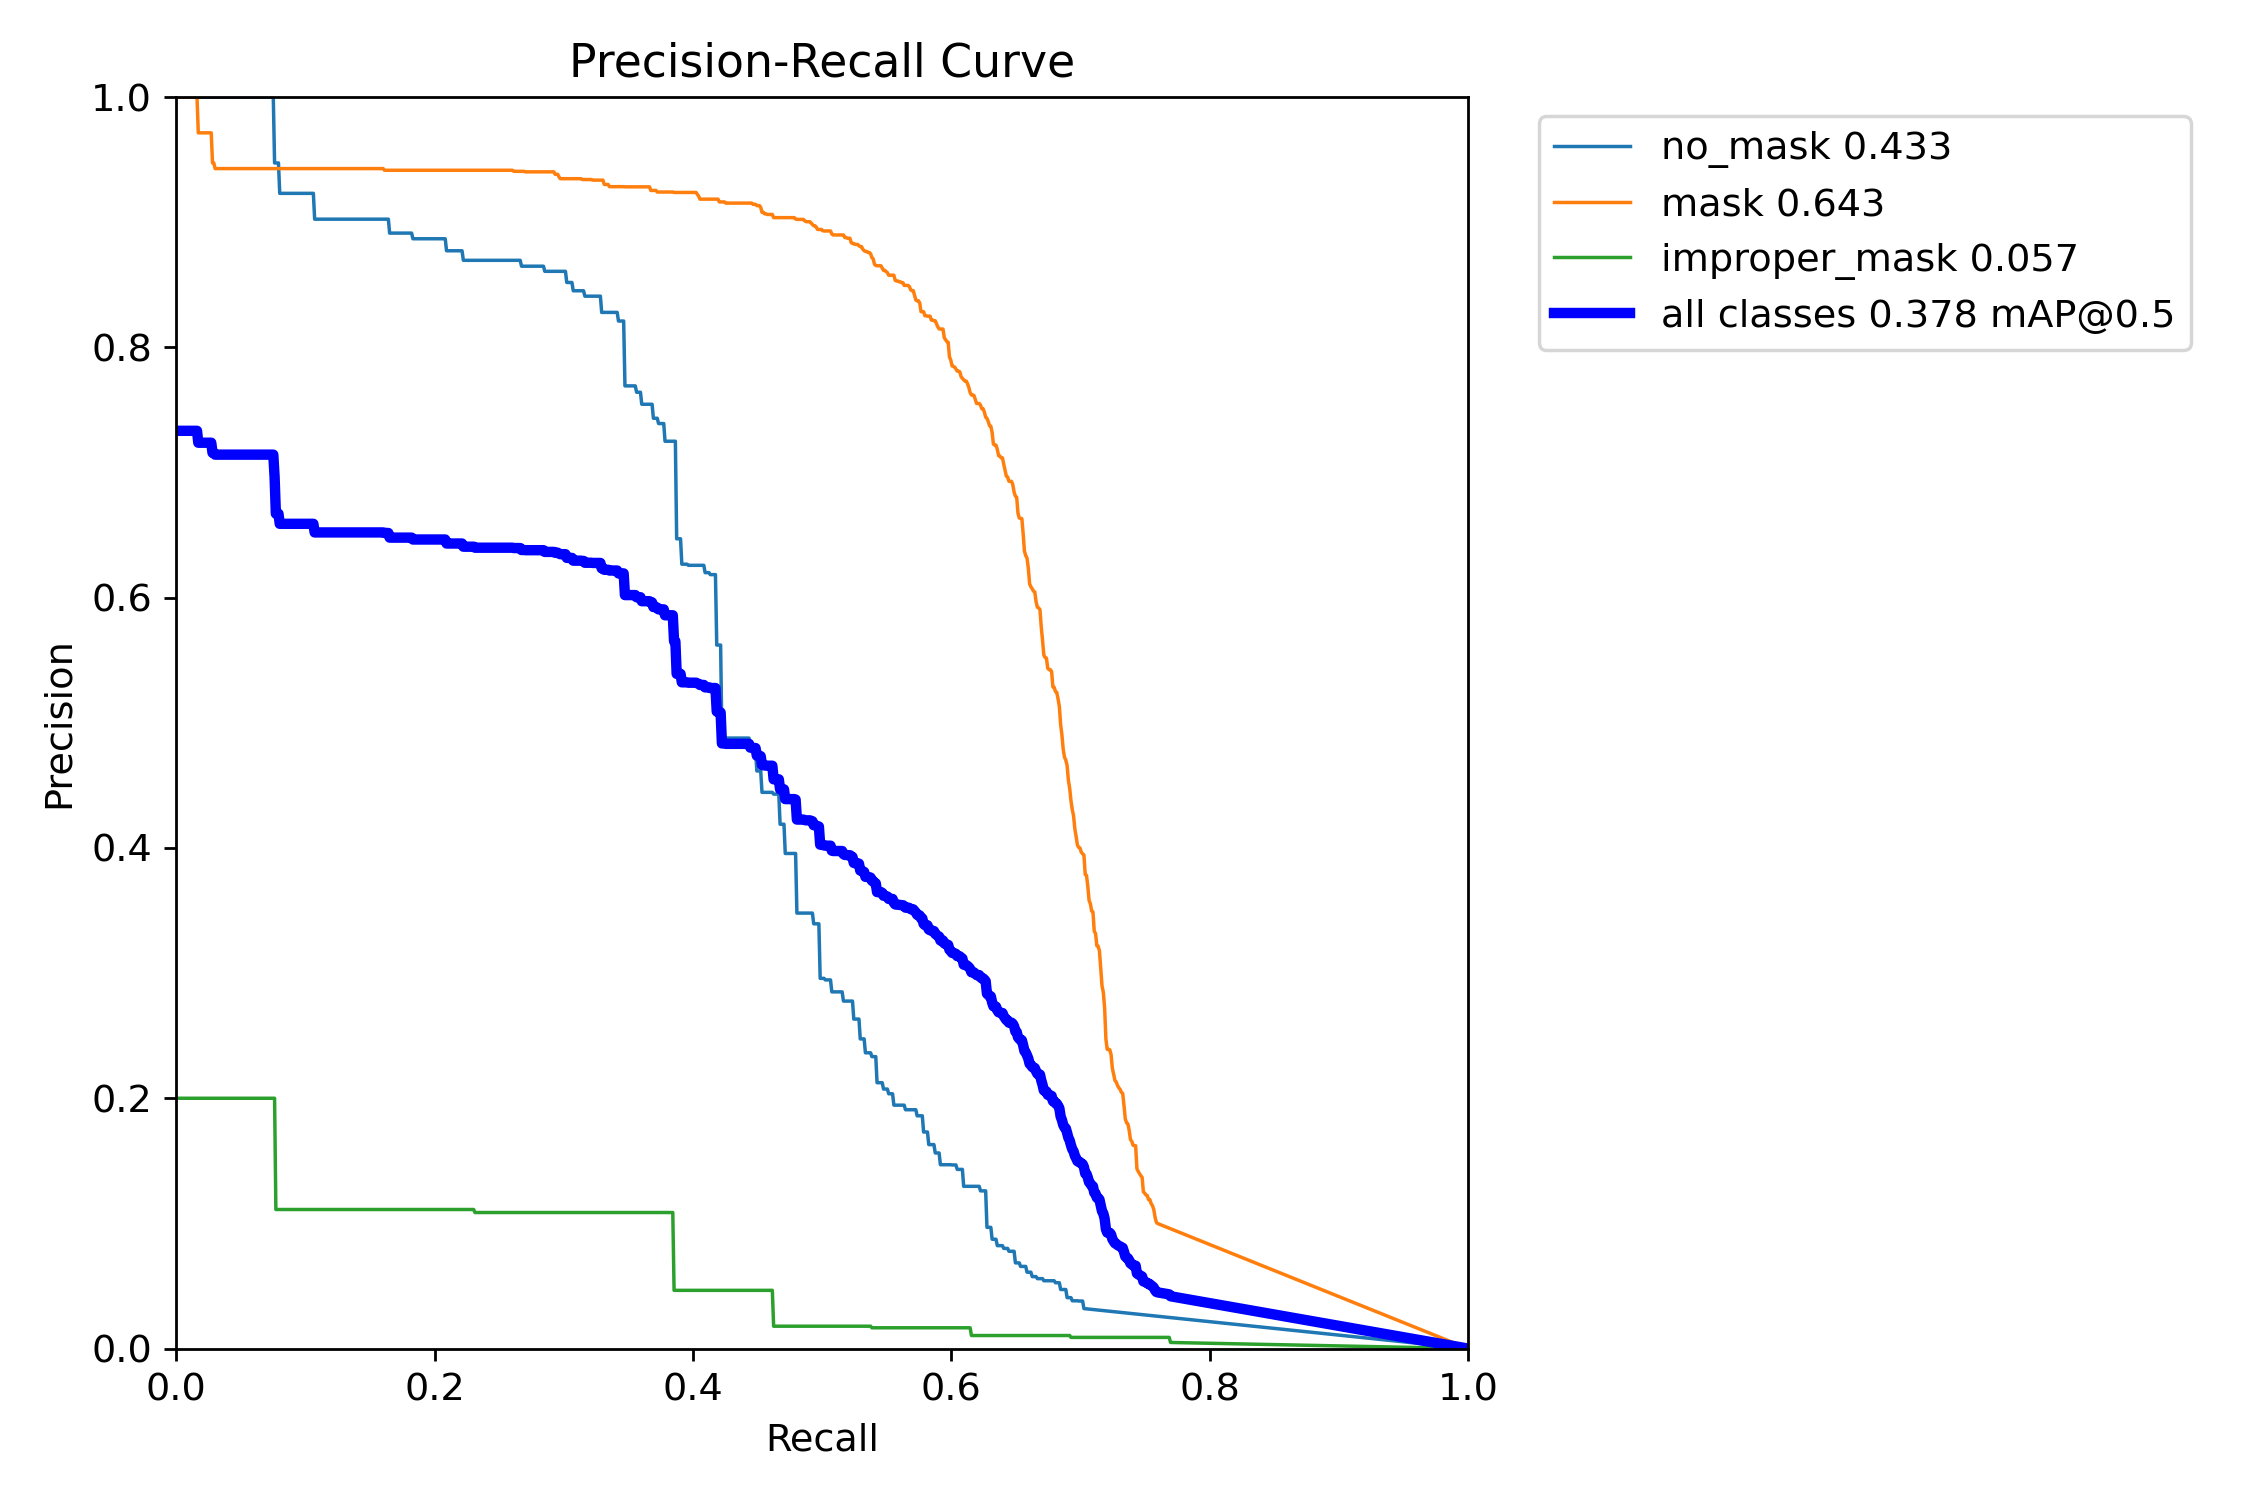

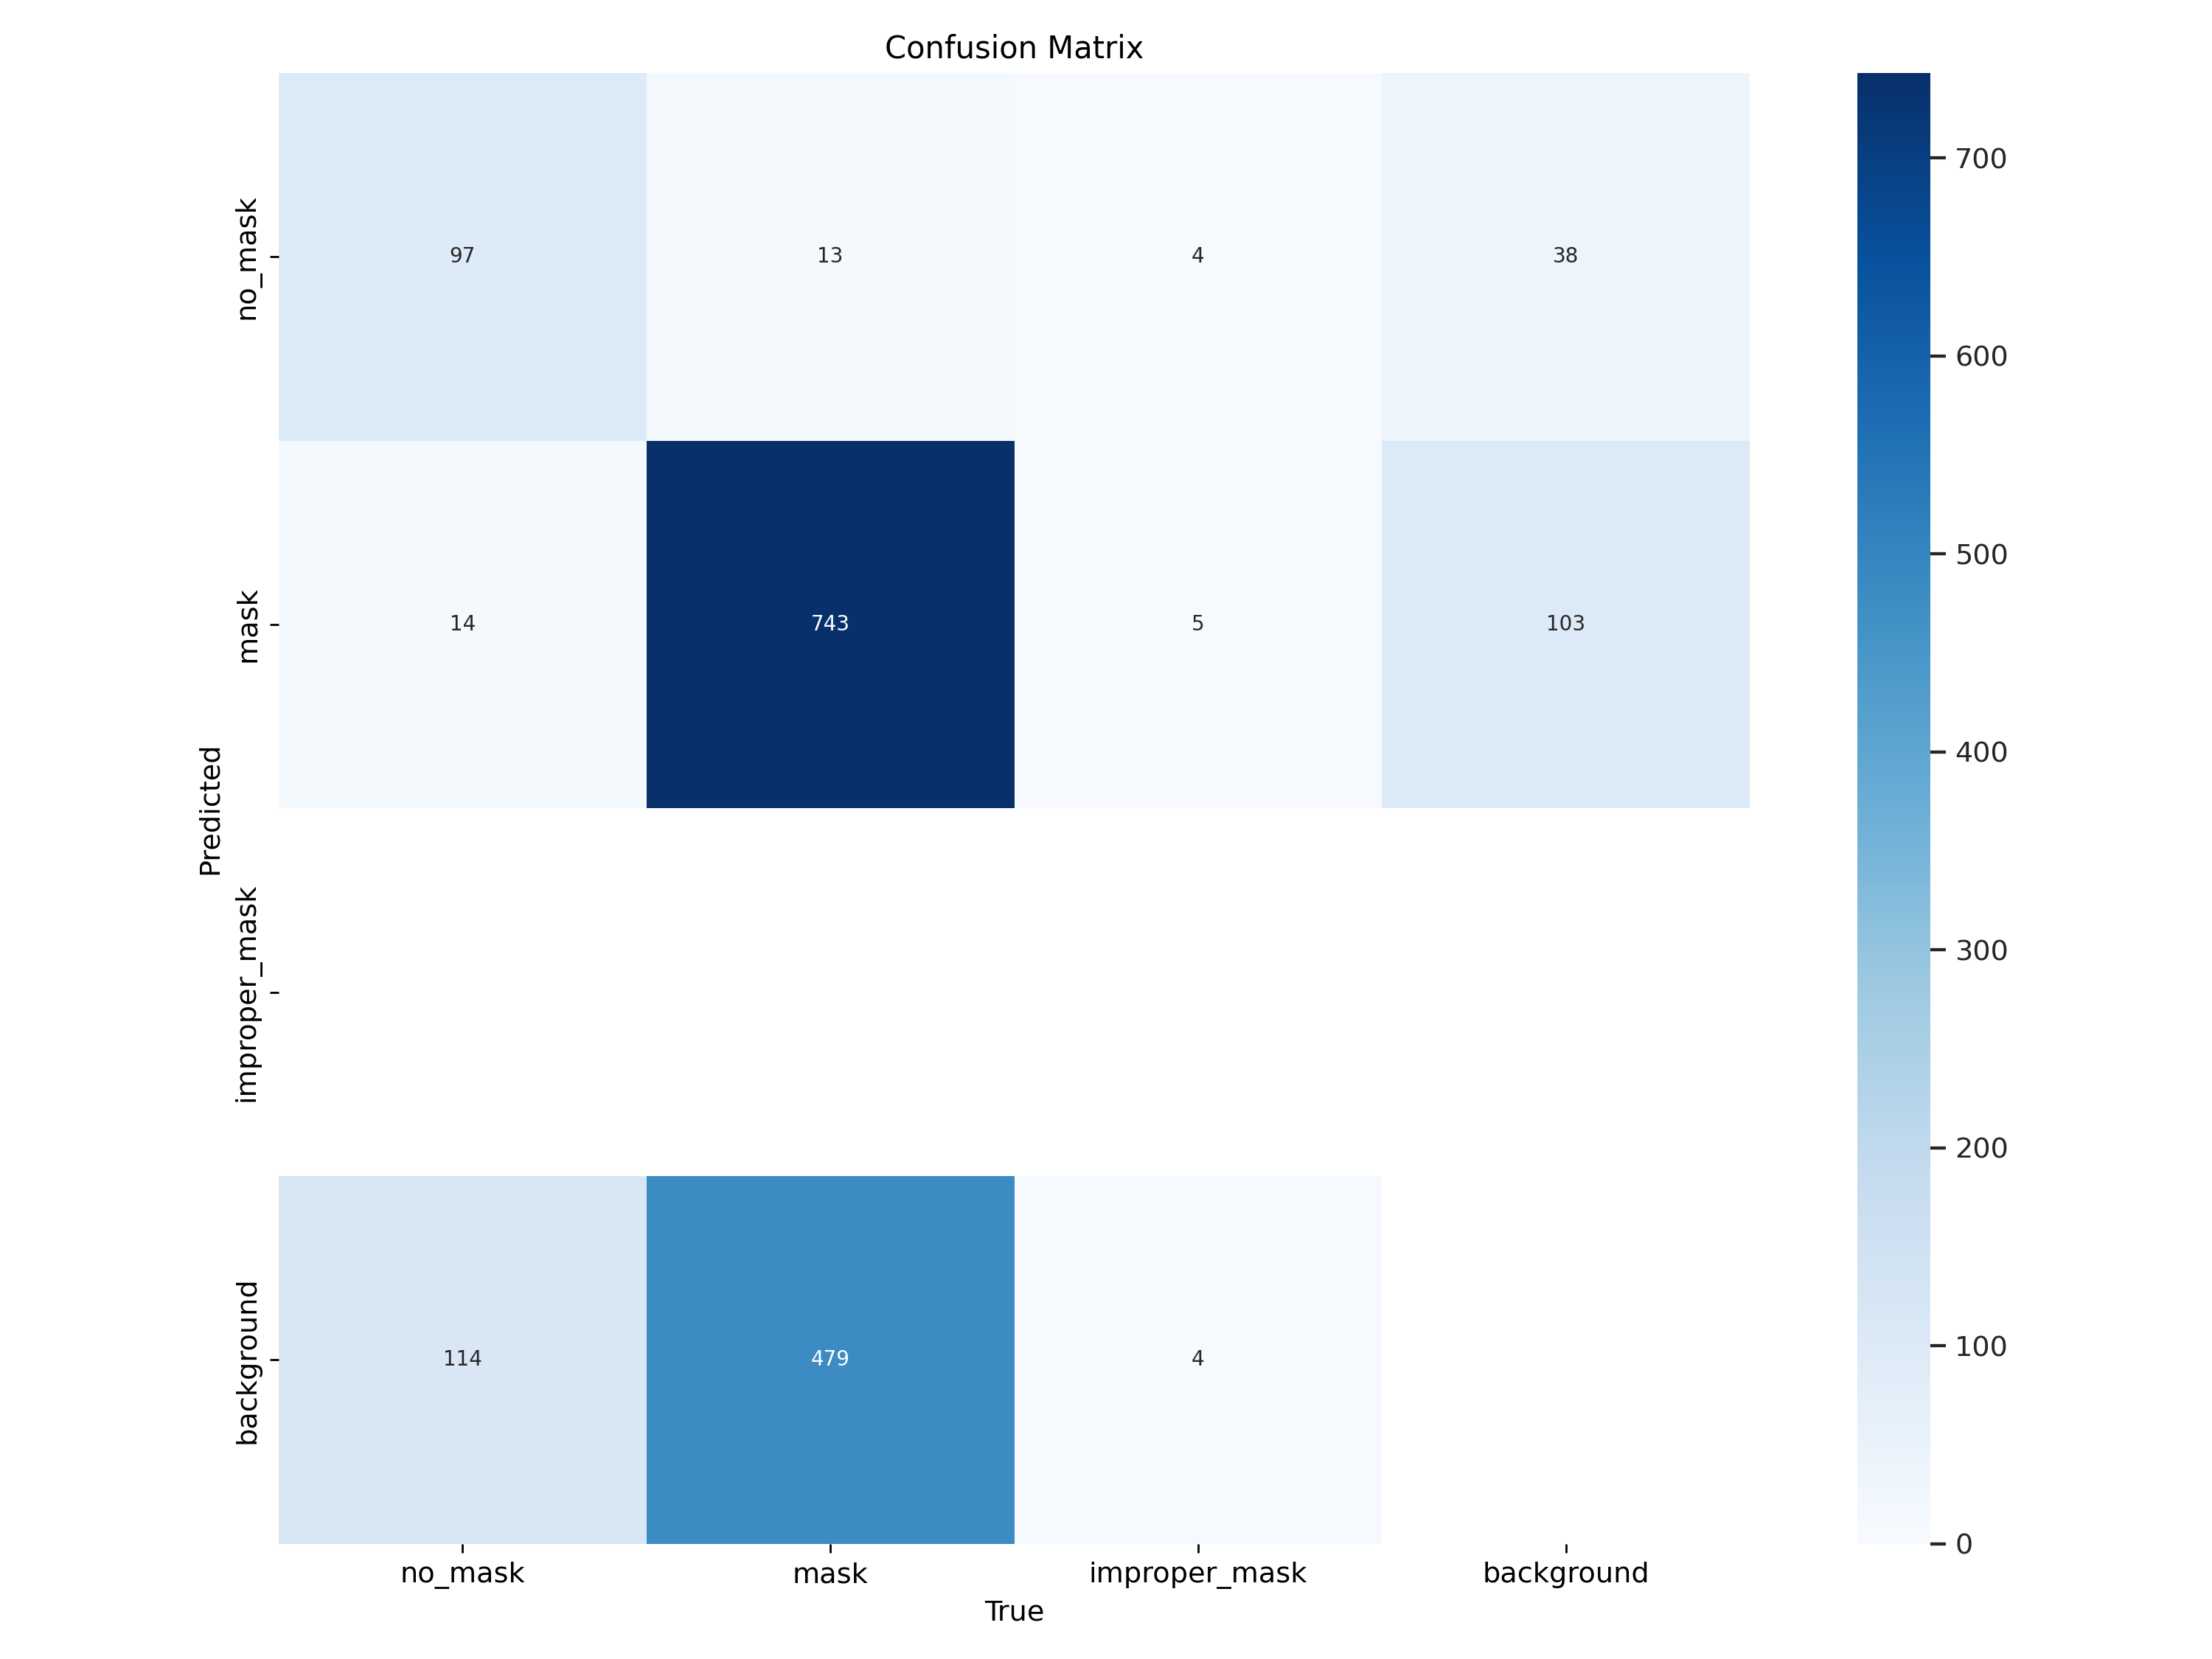

In [7]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='/content/runs/detect/train16/F1_curve.png')
y = Image(filename='/content/runs/detect/train16/PR_curve.png')
z = Image(filename='/content/runs/detect/train16/confusion_matrix.png')
display(x, y,z)

In [4]:
# checking the latest trained files
!ls 'runs/detect/train2/weights'

In [6]:
# loading the trianed model
model = YOLO("/content/runs/detect/train16/weights/best.pt")  # load a custom model

In [20]:
img = "/content/maxresdefault.jpg"

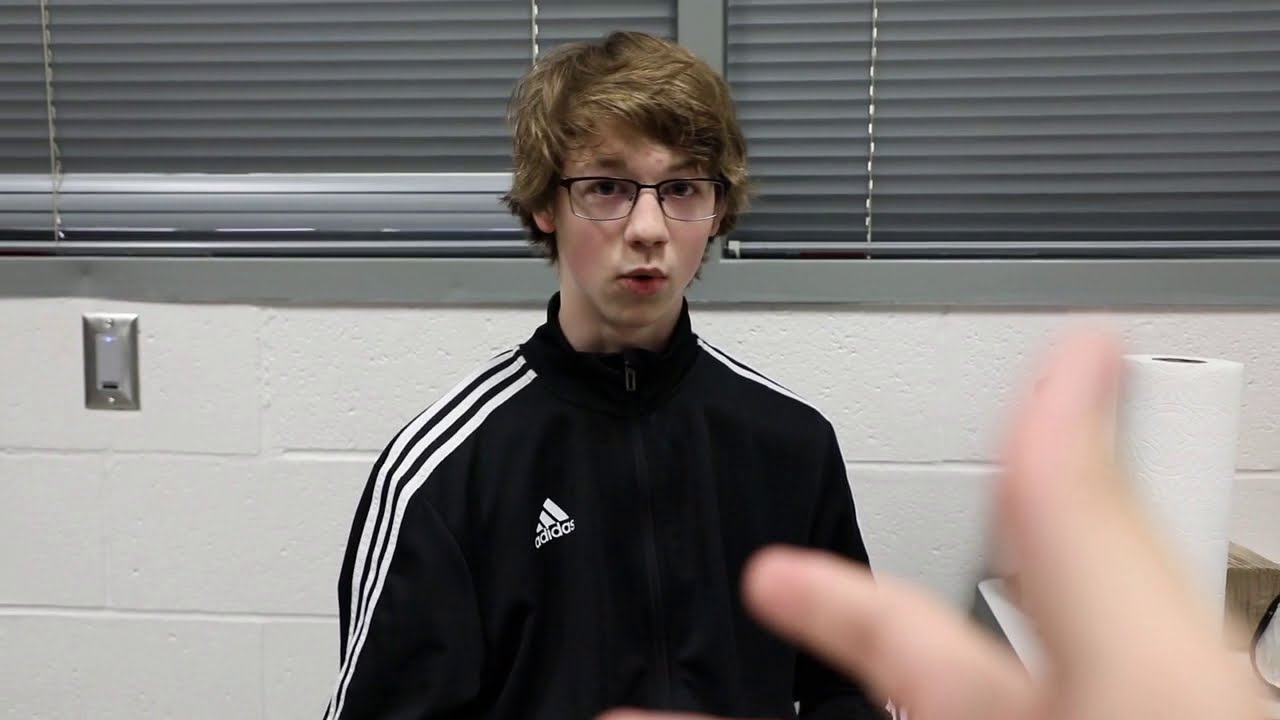

In [21]:
from IPython.display import Image
Image(filename=img, width = 300)

In [23]:
!yolo task=detect mode=predict model="runs/detect/train16/weights/best.pt" source="/content/maxresdefault.jpg"

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/maxresdefault.jpg: 128x224 1 no_mask, 104.7ms
Speed: 1.1ms preprocess, 104.7ms inference, 1.4ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [25]:
img1 = "/content/woman-wearing-mask.original.jpg"

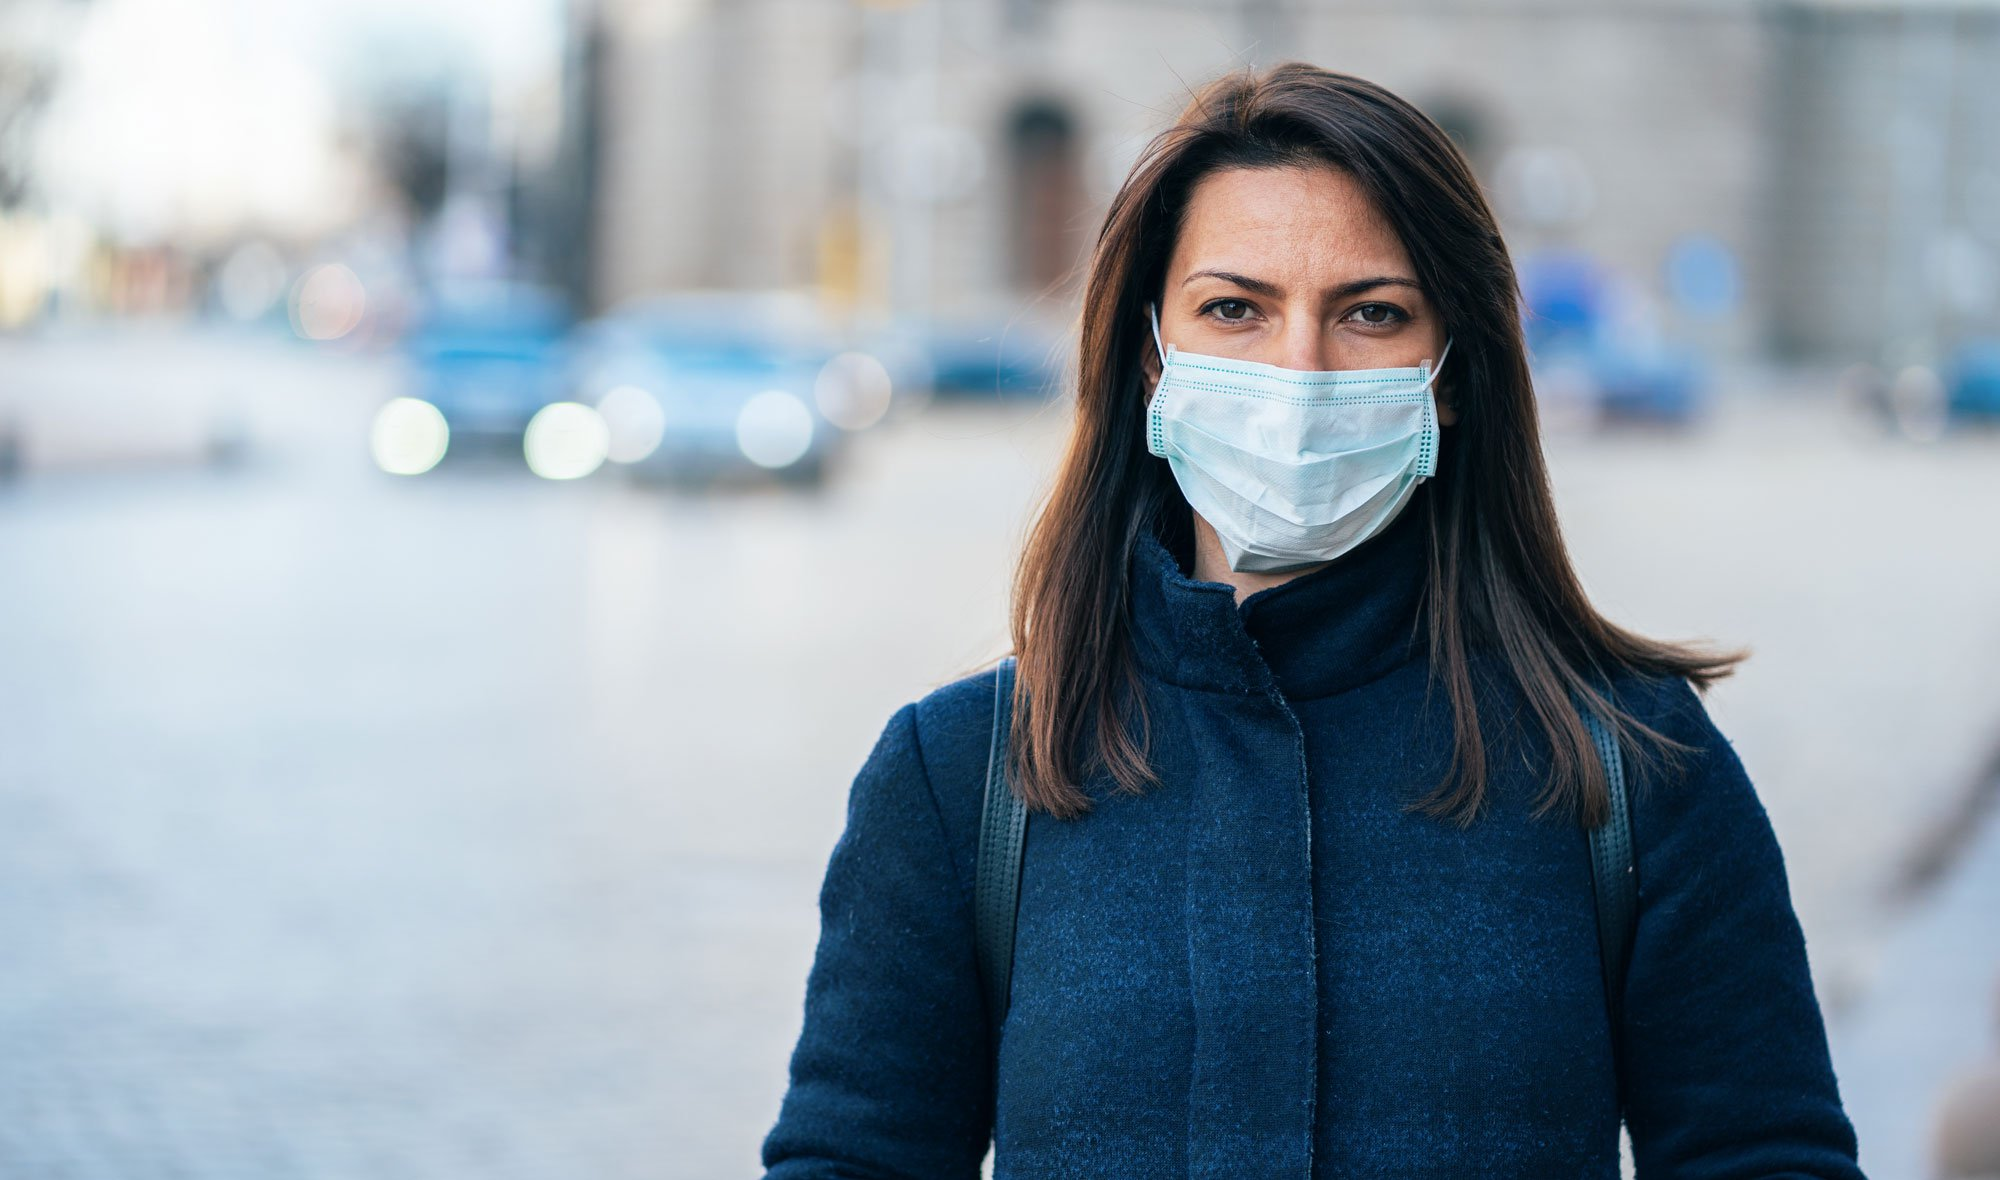

In [26]:
from IPython.display import Image
Image(filename=img1, width = 300)

In [27]:
!yolo task=detect mode=predict model="runs/detect/train16/weights/best.pt" source="/content/woman-wearing-mask.original.jpg"

Ultralytics YOLOv8.1.11 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/woman-wearing-mask.original.jpg: 160x224 1 mask, 86.1ms
Speed: 1.2ms preprocess, 86.1ms inference, 1.4ms postprocess per image at shape (1, 3, 160, 224)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict
